In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Dropout


Class Distribution:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Missing Values:
 review       0
sentiment    0
dtype: int64

Review Length Statistics:
 count    50000.000000
mean      1309.946840
std        990.682402
min          7.000000
25%        699.000000
50%        971.000000
75%       1591.000000
max      13704.000000
Name: review_length, dtype: float64


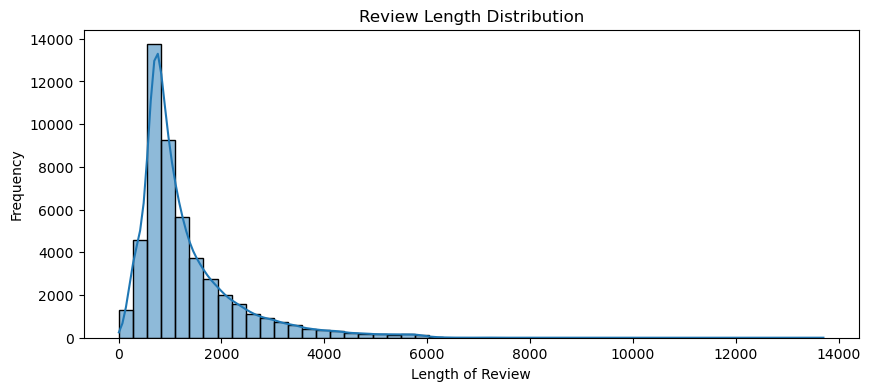


Sample Cleaned Reviews:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   

                                      cleaned_review  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production the filming tech...  
2  i thought this was a wonderful way to spend ti...  


In [3]:
#Task 1
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

#Load the dataset
df = pd.read_excel("D:/Download/Imdb.xlsx")  # Change path if needed

#Class distribution
print("Class Distribution:\n", df['sentiment'].value_counts())

#Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Add review length column
df['review_length'] = df['review'].apply(len)

#Review length stats
print("\nReview Length Statistics:\n", df['review_length'].describe())

#Plot distribution of review length
plt.figure(figsize=(10, 4))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Length of Review")
plt.ylabel("Frequency")
plt.show()

#Clean text (NO NLTK or spaCy)
def clean_text(text):
    text = text.lower()                                # lowercase
    text = re.sub(r"<.*?>", "", text)                  # remove HTML tags
    text = re.sub(r"[^a-z\s]", "", text)               # remove special characters
    text = re.sub(r"\s+", " ", text).strip()           # remove extra spaces
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

#View sample cleaned reviews
print("\nSample Cleaned Reviews:")
print(df[['review', 'cleaned_review']].head(3))


Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       100
           1       0.79      0.82      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



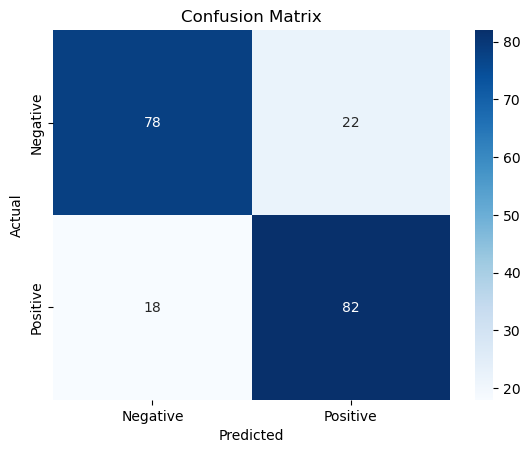

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data (if not already loaded)
df = pd.read_excel("D:/Download/Imdb.xlsx")
df = df.head(1000)  # Optional: reduce size for faster runs
df['review'] = df['review'].astype(str)

# Text cleaning (reuse your function or assume already done)
def clean_text(text):
    import re
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Clean reviews
df['cleaned_review'] = df['review'].apply(clean_text)

# Encode labels (e.g., positive = 1, negative = 0)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:
# Encode sentiment labels
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])  # 0 = negative, 1 = positive

# Split data
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['cleaned_review'], df['sentiment_encoded'], test_size=0.2, random_state=42
)

# TF-IDF for traditional ML models
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

# --- Traditional ML Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

print("Training traditional ML models...")
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# --- LSTM Neural Network ---
# Tokenize and pad sequences
vocab_size = 10000
max_len = 200

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Build LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("\nTraining LSTM model...")
model.fit(X_train_pad, y_train, validation_split=0.2, epochs=3, batch_size=64)

# Evaluate LSTM
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"\nLSTM Model Accuracy: {accuracy:.4f}")

# LSTM classification report
y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype("int32")
print("\nLSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm, target_names=label_encoder.classes_))


Training traditional ML models...

Logistic Regression Results:
Accuracy: 0.81
Precision: 0.8085106382978723
Recall: 0.7916666666666666
F1 Score: 0.8
[[86 18]
 [20 76]]

Naive Bayes Results:
Accuracy: 0.815
Precision: 0.8831168831168831
Recall: 0.7083333333333334
F1 Score: 0.7861271676300579
[[95  9]
 [28 68]]

SVM Results:
Accuracy: 0.835
Precision: 0.8247422680412371
Recall: 0.8333333333333334
F1 Score: 0.8290155440414507
[[87 17]
 [16 80]]

Random Forest Results:
Accuracy: 0.77
Precision: 0.8048780487804879
Recall: 0.6875
F1 Score: 0.7415730337078652
[[88 16]
 [30 66]]

Training LSTM model...
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.4851 - loss: 0.6943 - val_accuracy: 0.5063 - val_loss: 0.6931
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.5752 - loss: 0.6909 - val_accuracy: 0.5312 - val_loss: 0.6924
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.5674 - loss: 0.6873 - val_accuracy: 0.5000 - val_loss: 0.6920
7/7 ━━━━━━━━━━━━

In [10]:
# Train models
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

# Define evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate all models
evaluate_model("Logistic Regression", y_test, logreg.predict(X_test_tfidf))
evaluate_model("Naive Bayes", y_test, nb.predict(X_test_tfidf))
evaluate_model("SVM", y_test, svm.predict(X_test_tfidf))
evaluate_model("Random Forest", y_test, rf.predict(X_test_tfidf))


Logistic Regression Evaluation:
Accuracy: 0.81
Precision: 0.8085106382978723
Recall: 0.7916666666666666
F1 Score: 0.8
Confusion Matrix:
 [[86 18]
 [20 76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       104
           1       0.81      0.79      0.80        96

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200


Naive Bayes Evaluation:
Accuracy: 0.815
Precision: 0.8831168831168831
Recall: 0.7083333333333334
F1 Score: 0.7861271676300579
Confusion Matrix:
 [[95  9]
 [28 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.84       104
           1       0.88      0.71      0.79        96

    accuracy                           0.81       200
   macro avg       0.83      0.81      0.81       200
weighted avg       0.83      0.